<a href="https://colab.research.google.com/github/Sabarishsusiraj/car_price_prediction-using-linear-regression/blob/main/Car_Price_Prediction_using_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

In [124]:
data=pd.read_csv("/content/car data (1).csv")
data.head(10)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
5,vitara brezza,2018,9.25,9.83,2071,Diesel,Dealer,Manual,0
6,ciaz,2015,6.75,8.12,18796,Petrol,Dealer,Manual,0
7,s cross,2015,6.50,8.61,33429,Diesel,Dealer,Manual,0
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0
9,ciaz,2015,7.45,8.92,42367,Diesel,Dealer,Manual,0


In [125]:
data["Seller_Type"].dtypes

dtype('O')

In [126]:
data.shape

(301, 9)

In [127]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [128]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [129]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [130]:
data.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


In [131]:
print(data.Car_Name.value_counts())
print(data.Fuel_Type.value_counts())
print(data.Seller_Type.value_counts())
print(data.Transmission.value_counts())

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Bajaj Avenger Street 220     1
etios gd                     1
Hero Super Splendor          1
Hero Glamour                 1
Bajaj Dominar 400            1
Name: Car_Name, Length: 98, dtype: int64
Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [132]:
data.Fuel_Type.unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

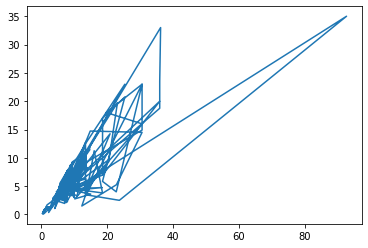

In [133]:
plt.plot(data['Present_Price'],data["Selling_Price"])

In [134]:
Y=data.Selling_Price
data.drop("Selling_Price",axis=1,inplace=True)

In [135]:
X=data

In [136]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1
                                               ,random_state=2)

In [137]:
s=(data.dtypes==object)
categorical_variables=list(s[s].index)
categorical_variables

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']

In [138]:
print(X_train[categorical_variables])

             Car_Name Fuel_Type Seller_Type Transmission
204               eon    Petrol      Dealer       Manual
249               i20    Petrol      Dealer       Manual
277              city    Petrol      Dealer       Manual
194  Hero  CBZ Xtreme    Petrol  Individual       Manual
244             verna    Diesel      Dealer       Manual
..                ...       ...         ...          ...
75            etios g    Petrol      Dealer       Manual
22                sx4    Petrol      Dealer    Automatic
72      corolla altis    Petrol      Dealer       Manual
15             ertiga    Diesel      Dealer       Manual
168  Honda CB Trigger    Petrol  Individual       Manual

[270 rows x 4 columns]


In [139]:
X_test.columns

Index(['Car_Name', 'Year', 'Present_Price', 'Kms_Driven', 'Fuel_Type',
       'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [140]:
object_cols=[cols for cols in X_train.columns if X_train[cols].dtype=="object"]
print(object_cols)
good_label_cols = [col for col in object_cols if set(X_test[col]).issubset(set(X_train[col]))]
print(good_label_cols)
bad_label_cols=list(set(object_cols)-set(good_label_cols))
print(bad_label_cols)
X_train.drop(bad_label_cols,axis=1,inplace=True)
X_test.drop(bad_label_cols,axis=1,inplace=True)

['Car_Name', 'Fuel_Type', 'Seller_Type', 'Transmission']
['Fuel_Type', 'Seller_Type', 'Transmission']
['Car_Name']


In [141]:
"""encoded_X_train=X_train.copy()
encoded_X_test=X_test.copy()
ordinal_encoder = OrdinalEncoder()
encoded_X_train[good_label_cols] = ordinal_encoder.fit_transform(X_train[good_label_cols])
encoded_X_test[good_label_cols] = ordinal_encoder.fit_transform(X_test[good_label_cols])
print(encoded_X_train.head)"""

'encoded_X_train=X_train.copy()\nencoded_X_test=X_test.copy()\nordinal_encoder = OrdinalEncoder()\nencoded_X_train[good_label_cols] = ordinal_encoder.fit_transform(X_train[good_label_cols])\nencoded_X_test[good_label_cols] = ordinal_encoder.fit_transform(X_test[good_label_cols])\nprint(encoded_X_train.head)'

In [142]:
onehot_X_train=X_train.copy()
onehot_X_test=X_test.copy()
hot=OneHotEncoder(handle_unknown="ignore",sparse=False)
hot_X_train=pd.DataFrame(hot.fit_transform(onehot_X_train[good_label_cols]))
hot_X_test=pd.DataFrame(hot.transform(onehot_X_test[good_label_cols]))
hot_X_train.index=onehot_X_train.index
hot_X_test.index=onehot_X_test.index
onehot_X_train.drop(good_label_cols,axis=1,inplace=True)
onehot_X_test.drop(good_label_cols,axis=1,inplace=True)
finalhot_X_train=pd.concat([onehot_X_train,hot_X_train],axis=1)
finalhot_X_test=pd.concat([onehot_X_test,hot_X_test],axis=1)
print(finalhot_X_train.shape)
print(finalhot_X_test.shape)

(270, 11)
(31, 11)


In [143]:
"""scale=StandardScaler()

scaled_X_train=scale.fit_transform(finalhot_X_train)
scaled_X_test=scale.transform(finalhot_X_test)
print(scaled_X_train)"""

'scale=StandardScaler()\n\nscaled_X_train=scale.fit_transform(finalhot_X_train)\nscaled_X_test=scale.transform(finalhot_X_test)\nprint(scaled_X_train)'

In [144]:
model=LinearRegression()
model.fit(finalhot_X_train,Y_train)
predicted_Y=model.predict(finalhot_X_test)
print("mse:",mean_absolute_error(Y_test,predicted_Y))
print("r2score:",r2_score(Y_test,predicted_Y))

mse: 1.072591372400959
r2score: 0.8693753727250251


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


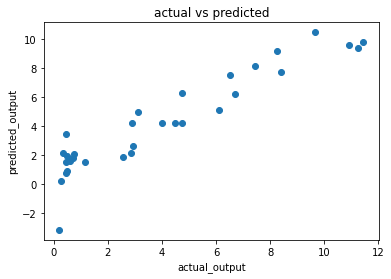

In [145]:
plt.scatter(Y_test,predicted_Y)
plt.xlabel("actual_output")
plt.ylabel("predicted_output")
plt.title("actual vs predicted")
plt.show()

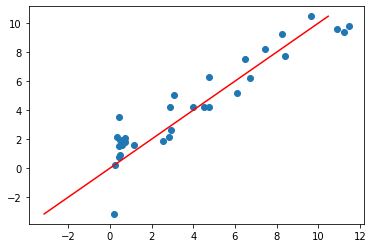

In [146]:
p1=min(predicted_Y)
p2=max(predicted_Y)
plt.plot([p1,p2],[p1,p2],"r")
plt.scatter(Y_test,predicted_Y)
plt.show()